# pandas-05 시계열 (Timeseries)
<img src="http://goo.gl/ht49rJ" >

#### 2017 FinanceData http://fb.com/financedata

# Pandas 에서 시계열 데이터

시계열 데이터: 인덱스가 DatetimeIndex 인 데이터

시계열 데이터와 다른 데이터의 차이는 인덱스이다. 특정 순간을 타임스탬프(Timestamp)라고 하며, 이 Timestamp 를 인덱스(DatetimeIndex)로 하는 데이터를 시계열 데이터라고 한다.



# 시계열 관련 클래스와 생성 방법

클래스  | 설명 | 생성 방법
-- | -- | --
Timestamp | 하나의 타임스탬프 | to_datetime, Timestamp
DatetimeIndex | Timestamp 타입 인덱스 | to_datetime, date_range, DatetimeIndex
Period | 하나의 시간 구간 | Period
PeriodIndex | Period 타입 인덱스 | period_range, PeriodIndex

DatetimeIndex 는 보통 다음 함수로 만든다.
* pd.to_datetime()
* pd.date_range()

In [35]:
from IPython.display import display

import pandas as pd
import numpy as np

# pd.to_datetime()
문자열 시간을 DatetimeIndex로 만들기

In [36]:
date_str = ['2016-01-11', '2016, 7, 1', 'May, 1 2016']
inx = pd.to_datetime(date_str)
inx

DatetimeIndex(['2016-01-11', '2016-07-01', '2016-05-01'], dtype='datetime64[ns]', freq=None)

# pd.date_range()
* 시작, 종료를 지정하여 일 단위로 생성
* freq 를 지정하여 특정 단위로 생성

freq 를 지정하는 다양한 방법들 <br>
http://pandas.pydata.org/pandas-docs/version/0.18.0/timeseries.html#offset-aliases

In [37]:
inx = pd.date_range('2016-01-01', '2016-01-15', freq='D')
inx

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14', '2016-01-15'],
              dtype='datetime64[ns]', freq='D')

In [38]:
# 특정 날짜로 부터 10 Days
display( pd.date_range(start="2016-9-1", periods=10) )

# 주말 제외 (Business day)
display( pd.date_range("2016-9-1", "2016-9-30", freq="B") )

# 30분 단위
display( pd.date_range('2014-10-01 09:00', '2014-10-01 15:30', freq='30min') )

DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04',
               '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08',
               '2016-09-09', '2016-09-10'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-05', '2016-09-06',
               '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-12',
               '2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16',
               '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22',
               '2016-09-23', '2016-09-26', '2016-09-27', '2016-09-28',
               '2016-09-29', '2016-09-30'],
              dtype='datetime64[ns]', freq='B')

DatetimeIndex(['2014-10-01 09:00:00', '2014-10-01 09:30:00',
               '2014-10-01 10:00:00', '2014-10-01 10:30:00',
               '2014-10-01 11:00:00', '2014-10-01 11:30:00',
               '2014-10-01 12:00:00', '2014-10-01 12:30:00',
               '2014-10-01 13:00:00', '2014-10-01 13:30:00',
               '2014-10-01 14:00:00', '2014-10-01 14:30:00',
               '2014-10-01 15:00:00', '2014-10-01 15:30:00'],
              dtype='datetime64[ns]', freq='30T')

In [39]:
# 분기 시작일
display( pd.date_range(start="2016-1-1", end='2016-12-30', freq='QS') )

# 매월 첫 영업일
display( pd.date_range(start="2016-1-1", end='2016-12-30', freq="BMS") )

# 매주 월요일
display( pd.date_range('2016-09-01', '2016-10-30', freq='W-MON') )

DatetimeIndex(['2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01'], dtype='datetime64[ns]', freq='QS-JAN')

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-02', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-03', '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', freq='BMS')

DatetimeIndex(['2016-09-05', '2016-09-12', '2016-09-19', '2016-09-26',
               '2016-10-03', '2016-10-10', '2016-10-17', '2016-10-24'],
              dtype='datetime64[ns]', freq='W-MON')

In [40]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('figure', figsize=(14, 4))
matplotlib.rc('axes', grid=True)

# 랜덤 워크 가격 생성

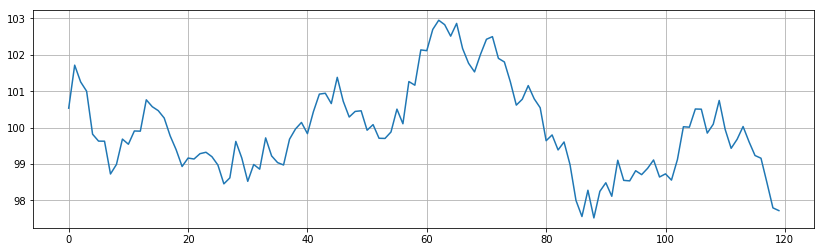

In [41]:
initial_price = 100.0  # 초기 가격
days = 120               # 120일
volatility = 0.005       # 변동성 

random_walk = np.random.normal(size=days) * volatility
return_rates = 1 + random_walk

prices = initial_price * np.cumprod(return_rates)
plt.plot(prices)
plt.show()

# DatetimeIndex 생성
* pd.date_range()

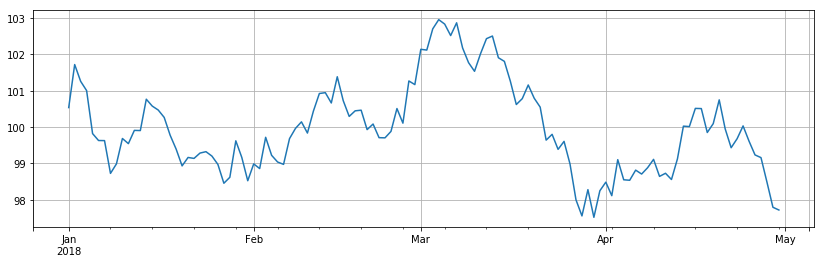

In [42]:
# 2018-01-01 시작, 1일 단위, 120일

ts_inx = pd.date_range(start='2018-01-01', freq='D', periods=120)
ts = pd.Series(prices, index=ts_inx)

ts.plot()
plt.show()

# resample 
* 5일 단위로 resample
* how() : mean, sum, first, last 등 (기본은 mean)

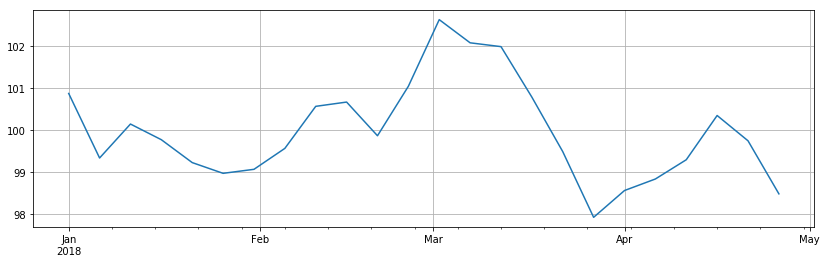

In [43]:
re_first = ts.resample('5D').mean()
re_first.plot()

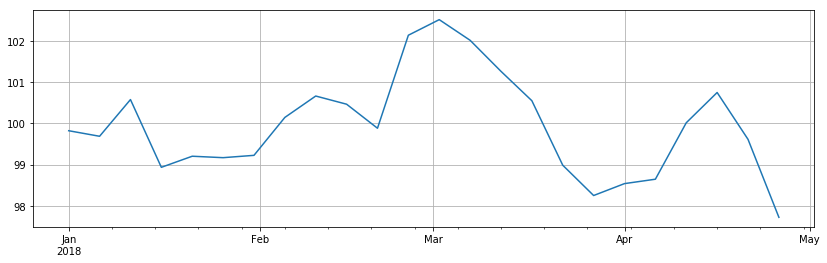

In [44]:
re_first = ts.resample('5D').last()
re_first.plot()

# resample().apply()
사용자 정의 resample()

In [45]:
def geo_mean(s):   # 기하평균
    return np.product(s.values) ** (1.0 / len(s))

re_geo = ts.resample('10D').apply(geo_mean)
re_geo

2018-01-01    100.094430
2018-01-11     99.951451
2018-01-21     99.094491
2018-01-31     99.310279
2018-02-10    100.609972
2018-02-20    100.445759
2018-03-02    102.344556
2018-03-12    101.376664
2018-03-22     98.699019
2018-04-01     98.695320
2018-04-11     99.813521
2018-04-21     99.107099
dtype: float64

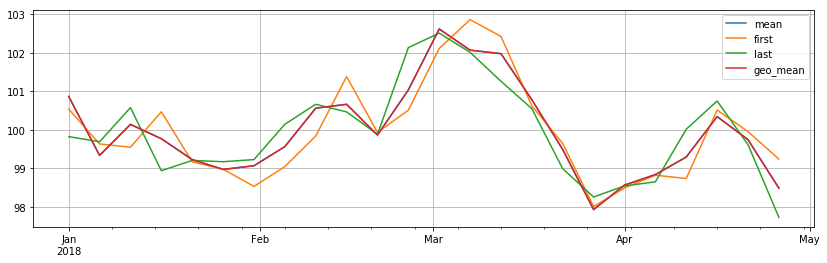

In [46]:
dfs = pd.DataFrame()

dfs['mean'] = ts.resample('5D').mean()
dfs['first'] = ts.resample('5D').first()
dfs['last'] = ts.resample('5D').last()
dfs['geo_mean'] = ts.resample('5D').apply(geo_mean)

dfs.plot()

# 다운 샘플링 
다운 샘플링(down-sampleing), 샘플링 시간의 간격을 더 작게하는 경우


In [47]:
# 1day to 6 hour
ts_hourly = ts.resample('6H').mean()
ts_hourly.head(10)

2018-01-01 00:00:00    100.534854
2018-01-01 06:00:00           NaN
2018-01-01 12:00:00           NaN
2018-01-01 18:00:00           NaN
2018-01-02 00:00:00    101.716681
2018-01-02 06:00:00           NaN
2018-01-02 12:00:00           NaN
2018-01-02 18:00:00           NaN
2018-01-03 00:00:00    101.256257
2018-01-03 06:00:00           NaN
Freq: 6H, dtype: float64

# fill
NaN을 채우는 방법
* fillna(0) - 모두 0으로 채운다.
* ffill() - forward fill
* bfill() - backward fill
* interpolate() - 보간

In [48]:
# ffill()
ffilled = ts.resample('6H').ffill()
ffilled.head(10)

2018-01-01 00:00:00    100.534854
2018-01-01 06:00:00    100.534854
2018-01-01 12:00:00    100.534854
2018-01-01 18:00:00    100.534854
2018-01-02 00:00:00    101.716681
2018-01-02 06:00:00    101.716681
2018-01-02 12:00:00    101.716681
2018-01-02 18:00:00    101.716681
2018-01-03 00:00:00    101.256257
2018-01-03 06:00:00    101.256257
Freq: 6H, dtype: float64

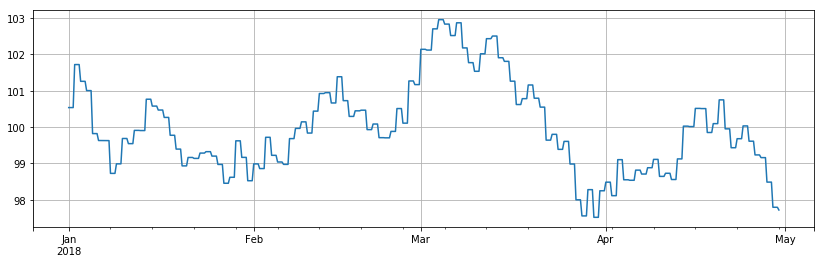

In [49]:
ffilled.plot()

In [50]:
# interpolate
linerfill = ts.resample('6H').interpolate()
linerfill.head(10)

2018-01-01 00:00:00    100.534854
2018-01-01 06:00:00    100.830311
2018-01-01 12:00:00    101.125768
2018-01-01 18:00:00    101.421224
2018-01-02 00:00:00    101.716681
2018-01-02 06:00:00    101.601575
2018-01-02 12:00:00    101.486469
2018-01-02 18:00:00    101.371363
2018-01-03 00:00:00    101.256257
2018-01-03 06:00:00    101.192522
Freq: 6H, dtype: float64

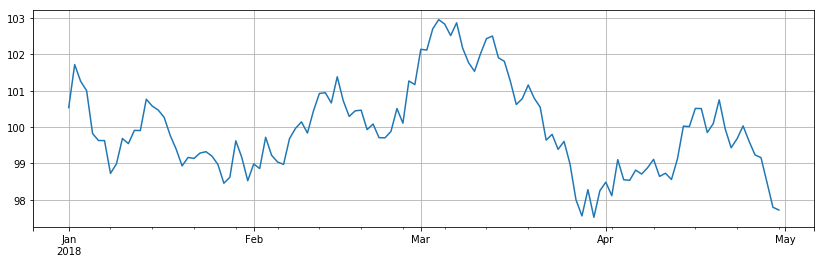

In [51]:
linerfill.plot()

# 시계열 가격 데이터 다루기

In [52]:
# 2016년 상반기, 애플(AAPL) 주가
# FinanceDataReader : https://github.com/FinanceData/FinanceDataReader

import FinanceDataReader as fdr
from datetime import datetime

start = datetime(2017, 1, 1)
end = datetime(2017, 12, 31)

df = fdr.DataReader("AAPL", start, end)
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,116.15,115.80,116.33,114.76,28780000.0,0.0028
2017-01-04,116.02,115.85,116.51,115.75,21120000.0,-0.0011
2017-01-05,116.61,115.92,116.86,115.81,22190000.0,0.0051
2017-01-06,117.91,116.78,118.16,116.47,31750000.0,0.0111
2017-01-09,118.99,117.95,119.43,117.94,33560000.0,0.0092


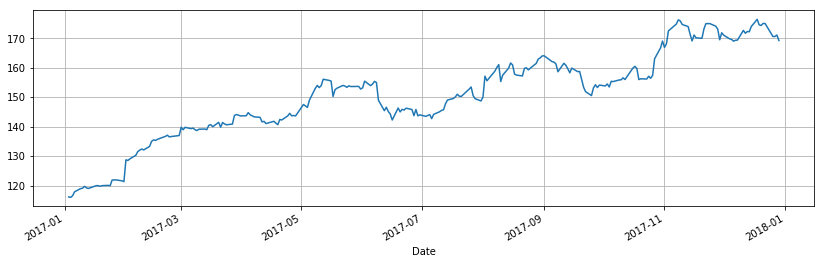

In [53]:
df['Close'].plot()

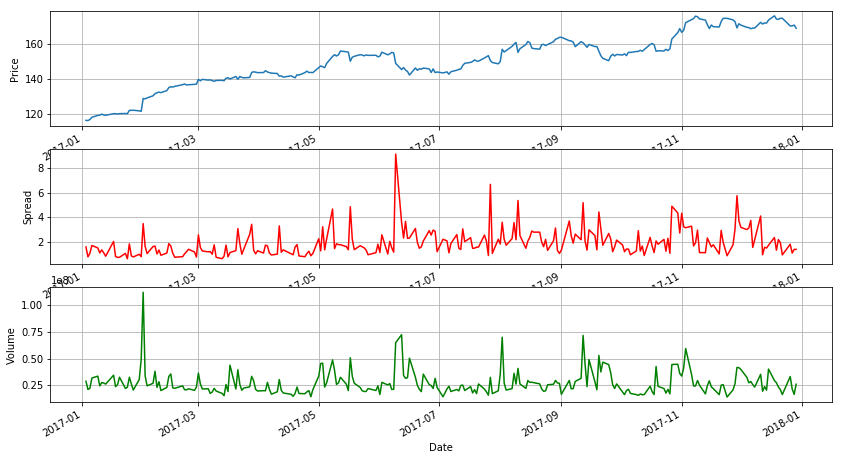

In [54]:
fig = plt.figure(figsize=(14,8))

# fig.add_subplot(mnx): m x n subplot 에서 x 번째 subplot
price_subplot = fig.add_subplot(311, xlabel='Date', ylabel='Price')
spread_subplot = fig.add_subplot(312, xlabel='Date', ylabel='Spread')
volume_subplot = fig.add_subplot(313, xlabel='Date', ylabel='Volume')

df['Close'].plot(ax=price_subplot)

df_spread = df['High'] - df['Low']
df_spread.plot(ax=spread_subplot, color='r')

df['Volume'].plot(ax=volume_subplot, color='g')

거래량과 일일 스프레드(고가-저가) 사이의 상관계수(corr coef)

In [55]:
df_spread.corr(df['Volume'])

0.6022556413676963

# 구간 구하기

In [56]:
#df_jan = df.loc[pd.Timestamp('2017-01-01'):pd.Timestamp('2017-01-30')]

# 라벨 인덱싱
df_jan = df.loc['2017-01-01':'2017-01-30']
df_jan.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,116.15,115.80,116.33,114.76,28780000.0,0.0028
2017-01-04,116.02,115.85,116.51,115.75,21120000.0,-0.0011
2017-01-05,116.61,115.92,116.86,115.81,22190000.0,0.0051
2017-01-06,117.91,116.78,118.16,116.47,31750000.0,0.0111
2017-01-09,118.99,117.95,119.43,117.94,33560000.0,0.0092


In [57]:
df_jan = df.loc['2017-01-01':'2017-01-30', ['Open', 'Close']]
df_jan.head()

,Open,Close
Date,,
2017-01-03,115.80,116.15
2017-01-04,115.85,116.02
2017-01-05,115.92,116.61
2017-01-06,116.78,117.91
2017-01-09,117.95,118.99


# 종가가 시가보다 높은 날

In [58]:
df_up = df['Close'] > df['Open']
df_up.head()

Date
2017-01-03    True
2017-01-04    True
2017-01-05    True
2017-01-06    True
2017-01-09    True
dtype: bool

In [59]:
df[df_up].head(5)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,116.15,115.80,116.33,114.76,28780000.0,0.0028
2017-01-04,116.02,115.85,116.51,115.75,21120000.0,-0.0011
2017-01-05,116.61,115.92,116.86,115.81,22190000.0,0.0051
2017-01-06,117.91,116.78,118.16,116.47,31750000.0,0.0111
2017-01-09,118.99,117.95,119.43,117.94,33560000.0,0.0092


In [60]:
print (len(df)) 
print (len(df[df_up]))

251
132


2017-01-01 ~ 2017-12-31 기간, 총 251 Biz Day 동안, 시가보다 종가가 오른 날이 132일 이었다.

# 원/달러 환율
* DEXKOUS - South Korea / U.S. Foreign Exchange Rate
* FRED(미국 세인트루이스 연준)
* https://fred.stlouisfed.org/series/DEXKOUS


In [61]:
import pandas_datareader as pdr

start = datetime(2016, 1, 1)
end = datetime(2018, 12, 31)

df_kous = pdr.DataReader("DEXKOUS", 'fred', start, end)
df_kous.head(10)

,DEXKOUS
DATE,
2016-01-01,NaN
2016-01-04,1191.46
2016-01-05,1190.43
2016-01-06,1200.16
2016-01-07,1193.05
2016-01-08,1206.97
2016-01-11,1206.55
2016-01-12,1208.95
2016-01-13,1208.95


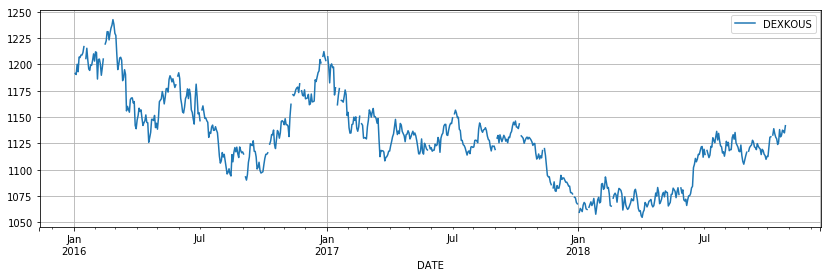

In [62]:
df_kous.plot()

# 원화 환산 가격 컬럼
해외 상품의 가격은 달러로 표시되며, 원/달러 환율은 매일 매일 달라진다. 
환율을 적용한 원화 가격을 얻으려면?

In [63]:
df['Price Won'] = df['Close'] * df_kous['DEXKOUS']
df.head()

,Close,Open,High,Low,Volume,Change,Price Won
Date,,,,,,,
2017-01-03,116.15,115.80,116.33,114.76,28780000.0,0.0028,140219.7645
2017-01-04,116.02,115.85,116.51,115.75,21120000.0,-0.0011,139000.0814
2017-01-05,116.61,115.92,116.86,115.81,22190000.0,0.0051,137886.6606
2017-01-06,117.91,116.78,118.16,116.47,31750000.0,0.0111,141356.4035
2017-01-09,118.99,117.95,119.43,117.94,33560000.0,0.0092,142848.6849


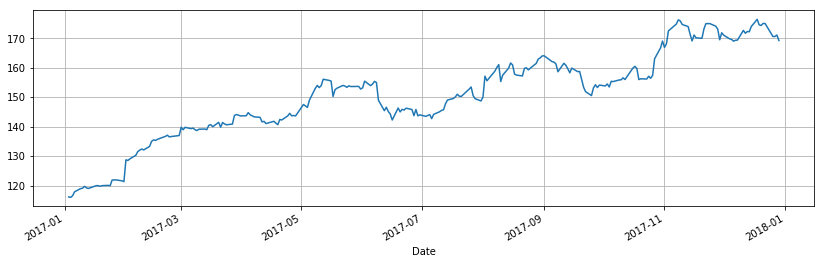

In [64]:
# 종가(달러) 차트

df['Close'].plot()

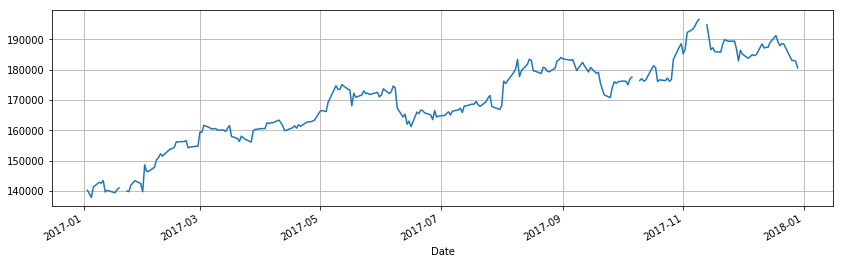

In [65]:
# 종가(원화) 차트

df['Price Won'].plot()

# 서로 다른 가격의 비교
두 컬럼만 추출, 모든 row를 첫번째 row로 나누는 방법 (초기 가격 대비 두개의 가격이 어떻게 달라지고 있는지를 보기 위함)


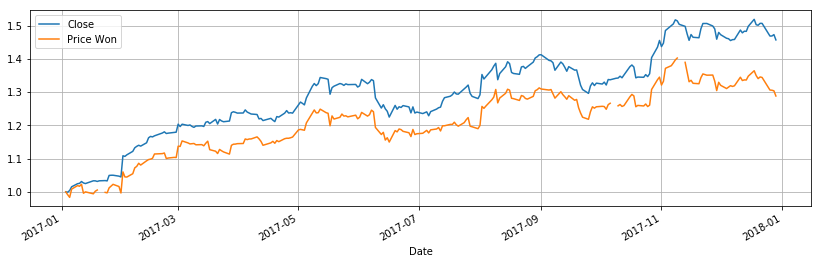

In [66]:
df_plot = df[['Close', 'Price Won']]
df_plot = df_plot / df_plot.iloc[0]
df_plot.plot()

# 차트 일반화(Normalize)
두 컬럼만 추출, 모든 row값을 각 row의 range값(최대-최소)으로 나눔 (데이터의 변화폭을 관찰하기 위함)

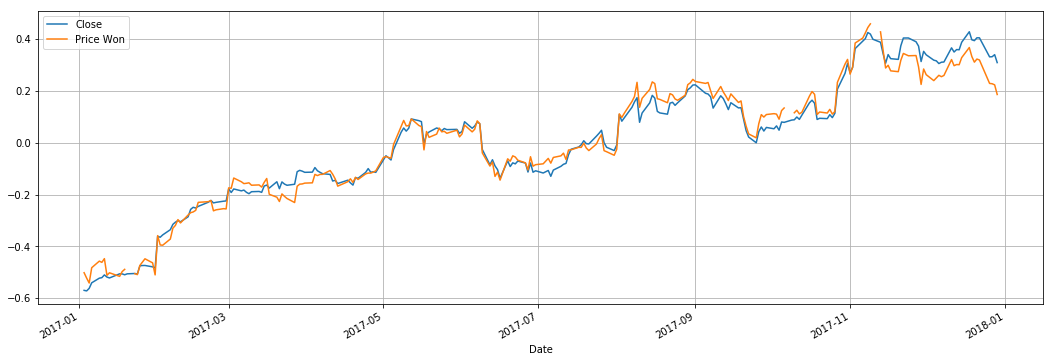

In [67]:
df_plot = df[['Close', 'Price Won']]
df_plot = (df_plot - df_plot.mean()) / (df_plot.max() - df_plot.min())
df_plot.plot(figsize=(18,6))

In [68]:
df['Price Won'].tail(10)

Date
2017-12-15    188999.2683
2017-12-18    191288.6776
2017-12-19    189251.9766
2017-12-20    187973.7090
2017-12-21    188674.7808
2017-12-22    188463.0187
2017-12-26    183149.5375
2017-12-27    183075.9780
2017-12-28    182822.9312
2017-12-29    180639.4866
Name: Price Won, dtype: float64

----
#### 2017~2018 FinanceData http://fb.com/financedata http://financedata.github.com